# Wine Quality Prediction 

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [141]:
data = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Machine Learning\Wine Quality\WineQT.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [3]:
data.drop(['Id'],axis = 1,inplace = True)

In [4]:
data.shape

(1143, 12)

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


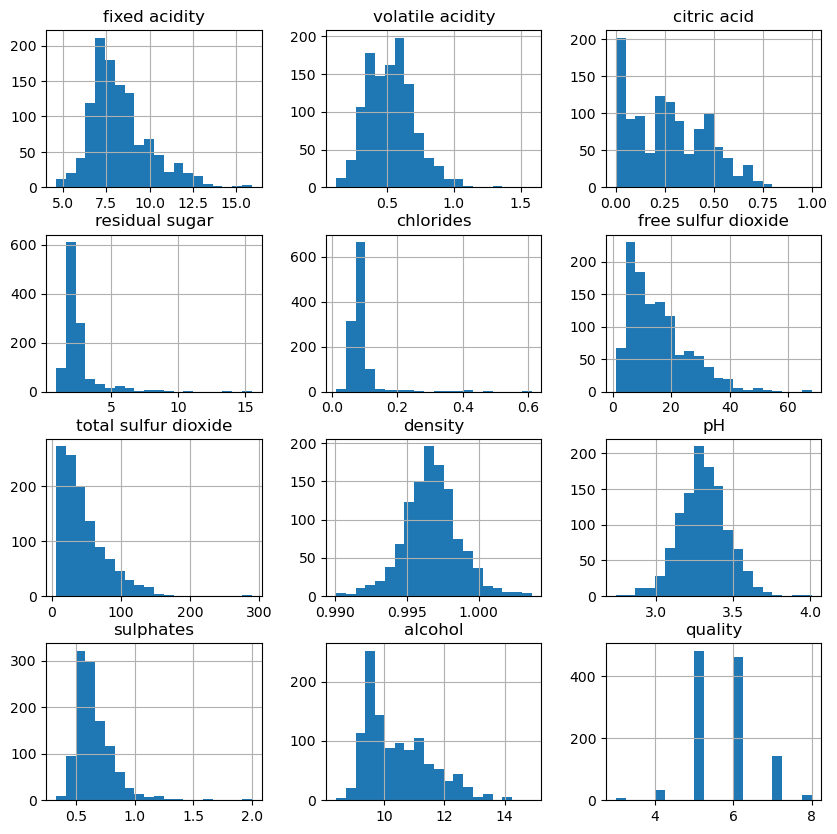

In [7]:
data.hist(bins = 20 , figsize = (10,10))
plt.show()

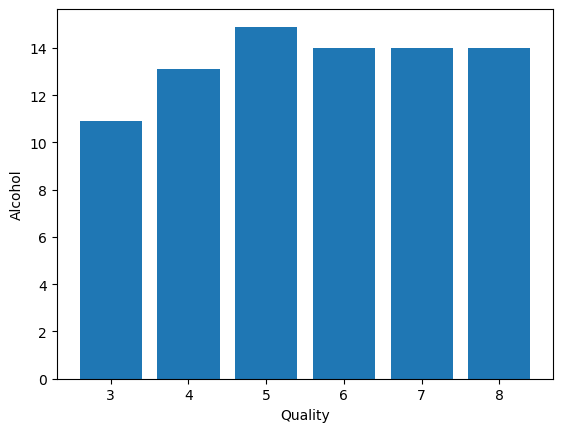

In [8]:
plt.bar(data.quality, data.alcohol);
plt.xlabel("Quality")
plt.ylabel("Alcohol");

In [9]:
data.drop(['total sulfur dioxide'],axis = 1,inplace = True)

In [10]:
data['Best_Quality'] = [1 if x >5 else 0 for x in data.quality]

In [11]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,Best_Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,0


In [12]:
data.Best_Quality.value_counts()

Best_Quality
1    621
0    522
Name: count, dtype: int64

In [13]:
X = data.drop(['quality','Best_Quality'],axis = 1)
Y = data['Best_Quality']

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test ,Y_train,Y_test = train_test_split(X,Y ,test_size = 0.2 , random_state = 42)


In [131]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)

In [132]:
X_test = scale.transform(X_test)

In [133]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train,Y_train)
print("Train Acccuracy : "+str(model_1.score(X_train,Y_train)))
print("Test Accuracy : "+str(model_1.score(X_test,Y_test)))

Train Acccuracy : 0.74945295404814
Test Accuracy : 0.74235807860262


In [134]:
from sklearn.svm import SVC
model_2 = SVC(kernel = 'rbf',gamma = 10,C=5)
model_2.fit(X_train,Y_train)
print("Train Acccuracy : "+str(model_2.score(X_train,Y_train)))
print("Test Accuracy : "+str(model_2.score(X_test,Y_test)))

Train Acccuracy : 0.8774617067833698
Test Accuracy : 0.8253275109170306


In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(n_estimators = 25,max_depth = 15,max_leaf_nodes = 15)
model_3.fit(X_train,Y_train)
print("Train Acccuracy : "+str(model_3.score(X_train,Y_train)))
print("Test Accuracy : "+str(model_3.score(X_test,Y_test)))

Train Acccuracy : 0.811816192560175
Test Accuracy : 0.7554585152838428


In [137]:
Y_pred = model_2.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test , Y_pred)
cm

array([[ 85,  17],
       [ 23, 104]], dtype=int64)

In [139]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       102
           1       0.86      0.82      0.84       127

    accuracy                           0.83       229
   macro avg       0.82      0.83      0.82       229
weighted avg       0.83      0.83      0.83       229

